# Chap.06 回帰1：映画の興行収入の予測

## 6.2 データの前処理

In [37]:
# ライブラリの準備
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import pickle
%matplotlib inline


In [5]:
# 6-1 データの読み込み
df = pd.read_csv('../support/datafiles/cinema.csv')
print(df.head(), "\n")
print(df.tail())

   cinema_id   SNS1  SNS2         actor  original  sales
0       1375  291.0  1044   8808.994029         0   9731
1       1000  363.0   568  10290.709370         1  10210
2       1390  158.0   431   6340.388534         1   8227
3       1499  261.0   578   8250.485081         0   9658
4       1164  209.0   683  10908.539550         0   9286 

    cinema_id   SNS1  SNS2         actor  original  sales
95       1260  494.0  1050  11137.482810         1  10537
96       1283  505.0   928  11376.038540         1  10084
97       1861  368.0   966  10393.252480         0  10069
98       1006  326.0  1068   9454.019853         1  10218
99       1764  402.0   153  11144.482970         1  10435


In [6]:
# 6-2 欠損値の確認
df.isnull().any(axis=0)

cinema_id    False
SNS1          True
SNS2         False
actor         True
original     False
sales        False
dtype: bool

In [7]:
# 6-3 欠損値の穴埋め
# 欠損値を平均値で補完して、df2に代入する
df2 = df.fillna(df.mean())
# 穴埋めができているか確認する
df2.isnull().any(axis=0)

cinema_id    False
SNS1         False
SNS2         False
actor        False
original     False
sales        False
dtype: bool

<AxesSubplot:xlabel='SNS2', ylabel='sales'>

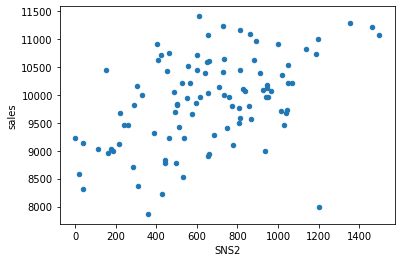

In [8]:
# 6-4 「SNS2」列と「sales」列の散布図を作成する
df.plot(kind='scatter', x='SNS2', y='sales')

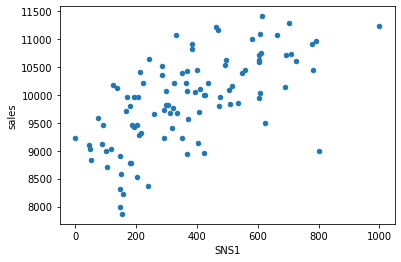

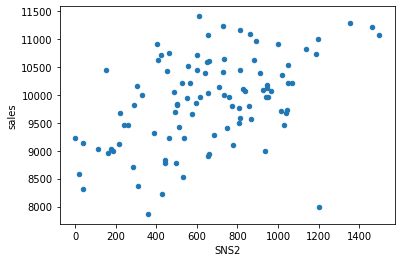

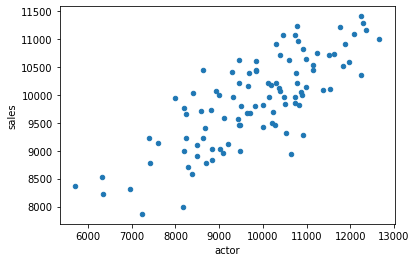

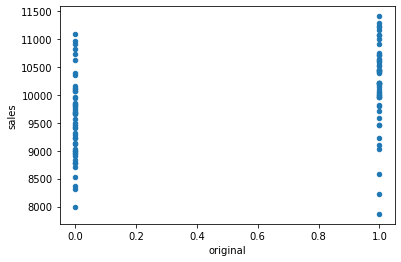

In [9]:
# 6-6 特徴量との組み合わせを変えて散布図を作成する
for name in df.columns:
    if name == 'cinema_id' or name == 'sales':
        continue

    df2.plot(kind='scatter', x=name, y='sales')

In [28]:
# 6-7 外れ値を削除する

# 外れ値を特定する
no = df2[(df2['SNS2'] > 1000) & (df2['sales'] < 8500)].index
print(df2.loc[no], "\n")
print(df2.shape)

    cinema_id   SNS1  SNS2        actor  original  sales
30       1855  149.0  1200  8173.096892         0   8000 

(100, 6)


In [27]:
# 該当のインデックスを削除して、df3に代入する
df3 = df2.drop(no, axis=0)
print(df3.shape)

(99, 6)


In [29]:
# 6-16 df3から特徴量の変数xと正解データの変数tに分割する
col = ['SNS1', 'SNS2', 'actor', 'original']
x = df3[col]
t = df3['sales']

In [30]:
# 6-21 スライス構文で特徴量を取り出す
x = df3.loc[:, 'SNS1':'original']

In [31]:
# 6-22 訓練データとテストデータに分割する
x_train, x_test, y_train, y_test = train_test_split(
    x, t, test_size=0.2, random_state=0
)

## 6.3 モデルの作成と学習

In [32]:
# 6-24 LinearRegression()関数を使ってモデルを作成する
model = LinearRegression()

In [33]:
# 6-25 fit()メソッドでモデルに学習させる
model.fit(x_train, y_train)

LinearRegression()

In [34]:
# 6-26 興行収入を予測する
new_data = [[150, 700, 300, 0]]
model.predict(new_data)

/Users/takeru/Library/CloudStorage/OneDrive-個人用/Learn/Python/Introduction_to_Machine_Learning_with_Python_Imp/ml_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6874.109753])

## 6.4 モデルの評価

In [35]:
# 6-27 score()メソッドでモデルのscoreを計算する
model.score(x_test, y_test)

0.7903881596570088

In [36]:
# 6-28 MAEを求める
pred = model.predict(x_test)
mean_absolute_error(y_pred=pred, y_true=y_test)

277.12236964086276

In [38]:
# 6-30 モデルを保存する
with open ('../models/cinema_model.pkl', 'wb') as f:
    pickle.dump(model, f)

## 6.5 回帰式による影響度の分析

In [41]:
# 6-31 係数と切片を確認する
print(model.coef_)
print(model.intercept_)

[  1.07645622   0.53400191   0.28473752 213.95584503]
6253.418729438708


In [42]:
# 6-32 列と係数を表示する
tmp = pd.DataFrame(model.coef_)
tmp.index = x_train.columns
tmp

,0
SNS1,1.076456
SNS2,0.534002
actor,0.284738
original,213.955845


## 6.7 練習問題

In [43]:
# Ex.6-1 データの読み込み
df = pd.read_csv('../support/datafiles/ex3.csv')

In [45]:
# Ex.6-2 データの先頭・末尾（各5行）を表示する
print(df.head(), "\n")
print(df.tail())
df.shape

         x0        x1        x2        x3      target
0  1.000943  2.114344 -1.148213 -0.051415   77.147293
1  1.505901 -0.626081  3.041686 -0.587336  278.595852
2 -0.390320  0.283607 -0.940359 -2.154124  -71.039904
3 -0.167273  1.413624 -0.632571 -1.016131   42.193870
4 -0.728801  1.370530  0.168298 -1.203904   89.167955 

          x0        x1        x2        x3      target
95  1.153983 -0.963715 -0.476624 -0.444866  -56.906275
96  0.694385 -0.887651 -0.741163 -1.317783  -88.449242
97 -0.159283  2.193451  0.398708  0.514709  170.731644
98 -0.105268 -1.009562 -1.166259  0.512022 -168.092939
99 -0.043852  0.131865 -0.158939 -0.666356  -10.455471


(100, 5)

In [46]:
# Ex.6-4 欠損値の確認
df.isnull().sum()

x0        2
x1        0
x2        2
x3        0
target    0
dtype: int64

In [47]:
# 欠損値を中央値で穴埋めする
df2 = df.fillna(df.median())
df2.isnull().sum()

x0        0
x1        0
x2        0
x3        0
target    0
dtype: int64

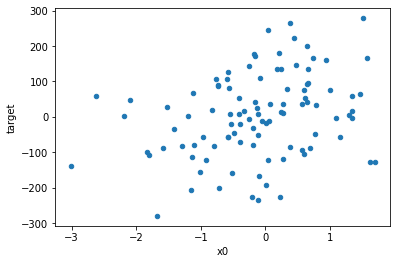

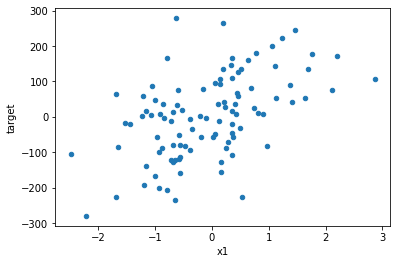

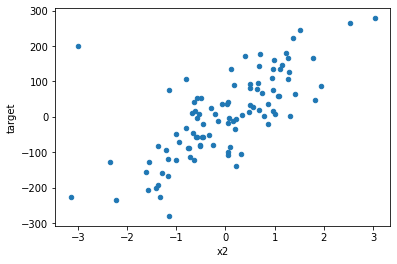

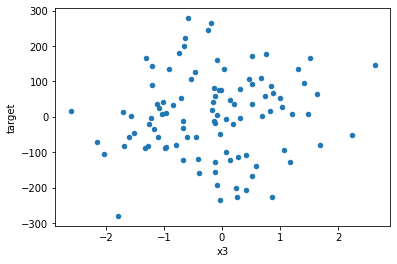

In [48]:
# EX.6-6 特徴量との組み合わせを変えて散布図を作成する
for name in df2.columns:
    if name == 'target':
        continue

    df2.plot(kind='scatter', x=name, y='target')


In [50]:
# Ex.6-7 外れ値を削除する
no = df2[(df['x2'] < -2) & (df2['target'] > 100)].index
print(df.loc[no])
print(df2.shape, "\n")

df3 = df2.drop(no, axis=0)
df3.shape

          x0        x1   x2        x3  target
23  0.652769  1.057642 -3.0 -0.644467   200.0
(100, 5) 



(99, 5)

In [52]:
# Ex.6-8 特徴量と正解データの分割
x = df3.loc[:, :'x3']
t = df3['target']

In [53]:
# EX.6-9 訓練データとテストデータの分割
x_train, x_test, y_train, y_test = train_test_split(
    x, t, test_size=0.2, random_state=1
)

In [55]:
# Ex.6-10 重回帰モデルの作成し、訓練データで学習する
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [56]:
# Ex.6-12 テストデータを使い、決定係数を計算する
model.score(x_test, y_test)

0.9820345074421969

In [58]:
# 列名と係数を表示する
tmp = pd.DataFrame(model.coef_)
tmp.index = x_train.columns
tmp.columns = ['coef']
print(tmp)
model.intercept_

         coef
x0  32.131876
x1  64.548468
x2  87.964865
x3  -0.414754


8.93594013561169